Задача - промоделировать волны в двумерном бассейне

Волны описываются системой уравнений
$$
    \begin{cases}
        \frac{\partial\bar{v}}{\partial t} = -\text{grad} h\\
        \frac{\partial h}{\partial t} = -\text{div}\bar{v}
    \end{cases}
\Longleftrightarrow
    \begin{cases}
            \frac{\partial v_x}{\partial t} = -\frac{\partial h}{\partial x}  (1)\\
            \frac{\partial v_y}{\partial t} = -\frac{\partial h}{\partial y}  (2)\\
            \frac{\partial h}{\partial t} = -\frac{\partial v_x}{\partial x}-\frac{\partial v_y}{\partial y} (3)
    \end{cases}   
$$
где $h(x, y)$ - высота жидкости, считаемая от дна, в каждой точке, $v_x$ и $v_y$ - скорость по $x$ и $y$ соответственно.

Предполагая достаточную гладкость функций, продифференцируем уравнение $(1)$ по $x$, уравнение $(2)$ - по $y$, сменим порядок частных производных и подставим в продифференцированное по $t$ уравнение $(3)$. В результате получим:

$$
    \frac{\partial^2h}{\partial t^2} = \frac{\partial^2h}{\partial x^2}+\frac{\partial^2h}{\partial y^2}
$$

Это уравнение выведено для проверки. Решить мы, однако же, будем исходную систему, поскольку задача далее будет усложняться и в общем случае похожее красивое уравнение получить не выйдет

Решать задачу будем в квадрате $(x,y)\in[0, 2\pi]\times[0, 2\pi]$ с граничными условиями типа тора, то есть 
$\substack{h(0, y) = h(2\pi, y)\\ h(x, 2) = h(x, 2\pi)}$

Нужно ввести разностную схему для нашей системы уравнений

$$
    \begin{cases}
            \frac{\partial u}{\partial t} = -\frac{\partial h}{\partial x}  (1)\\
            \frac{\partial v}{\partial t} = -\frac{\partial h}{\partial y}  (2)\\
            \frac{\partial h}{\partial t} = -\frac{\partial u}{\partial x}-\frac{\partial v}{\partial y} (3)
    \end{cases}
$$
Сделана для удобства замена $v_x=u$, $v_y=v$, чтобы индексов было поменьше

Индекс $i$ означает шаг по $x$, индекс $j$ - шаг по $y$. Выпишем  сначала явную (для простоты) разностную схему:

$$
    \begin{cases}
        \frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} = -\frac{h_{i+1,j}^n-h_{i-1,j}^n}{2\Delta x}\\
        \frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} = -\frac{h_{i,j+1}^n-h_{i,j-1}^n}{2\Delta y}\\
        \frac{h_{i,j}^{n+1}-h_{i,j}^n}{\Delta t} = -\frac{u_{i+1,j}^n-u_{i-1,j}^n}{2\Delta x}
        -\frac{v_{i,j+1}^n-v_{i,j-1}^n}{2\Delta y}\\
    \end{cases}
    \Longleftrightarrow
\\
\Longleftrightarrow
    \begin{cases}
        u_{i,j}^{n+1}=u_{i,j}^n-\frac{\Delta t}{2\Delta x}[h_{i+1,j}^n-h_{i-1,j}^n]\\
        v_{i,j}^{n+1}=v_{i,j}^n-\frac{\Delta t}{2\Delta y}[h_{i,j+1}^n-h_{i,j-1}^n]\\
        h_{i,j}^{n+1}=h_{i,j}^n-\frac{\Delta t}{2\Delta x}[u_{i+1,j}^n-u_{i-1,j}^n]-
        \frac{\Delta t}{2\Delta y}[v_{i,j+1}^n-v_{i,j-1}^n]\\
    \end{cases}
$$

In [1]:
import numpy as np
def u_0(x, y):    #initial condition of height h
    #return np.exp(- (x-np.pi)**2 - (y - np.pi)**2)
    return np.cos(x) * np.cos(y)
def dx_u_0(x, y): #initial condition  of velicity v_x
    return -2 * (x - np.pi) * np.exp(- (x-np.pi) * (x-np.pi) - (y - np.pi) * (y-np.pi))
def dy_u_0(x, y): #initial condition of velocity v_y
    return -2 * (y - np.pi) * np.exp(- (x-np.pi) * (x-np.pi) - (y - np.pi) * (y-np.pi))

N = 64   #number of steps on X axis
M = 64  #number of steps on Y axis
T = 300   #number of steps on t axis

dt = 0.01        #step of integration on t
dx = 2 * np.pi/(N + 1) #step of integration on x
dy = 2 * np.pi/(M + 1) #step of integration on y

x = np.array([i * dx for i in range(N + 1)])
y = np.array([i * dy for i in range(M + 1)])
   

#Create helping array of indices
ix_c = np.arange(0, N + 1, 1)
ix_p = np.roll(ix_c, -1)  #left shifted array  [1, 2, 3] -> [3, 1, 2]
ix_m = np.roll(ix_c, 1)   #right shifted array [1, 2, 3] -> [2, 3, 1]
iy_c = np.arange(0, M + 1, 1)
iy_p = np.roll(iy_c, -1)  
iy_m = np.roll(iy_c, 1)

h = np.zeros((T, N + 1, M + 1))
u = np.zeros((T, N + 1, M + 1))
v = np.zeros((T, N + 1, M + 1))

for i in range(N + 1):  #initializing of initial conditions
    for j in range(M + 1):
        h[0, i, j] = u_0(x[i], y[j])
        #u[0, i, j] = dx_u_0(x[i], y[j])
        #v[0, i, j] = dy_u_0(x[i], y[j])


In [5]:
#does not work for some reasons... ???
#for k in range(T - 1):
#    u[k + 1][ix_c][iy_c] = u[k][ix_c][iy_c] - dt / (2 * dx) * (h[k][ix_p][iy_c] - h[k][ix_m][iy_c])
#    v[k + 1][ix_c][iy_c] = v[k][ix_c][iy_c] - dt / (2 * dy) * (h[k][ix_c][iy_p] - h[k][ix_c][iy_m])
#    h[k + 1][ix_c][iy_c] = h[k][ix_c][iy_c] - dt / (2 * dx) * (u[k][ix_p][iy_c] - u[k][ix_m][iy_c]) - dt / (2 * dy) * (v[k][ix_c][iy_p] - v[k][ix_c][iy_m])

#не работает присваивание
#неверно идёт сдвиг массивов при вычислении функции v

In [2]:
#begin of the explicit scheme
for k in range(T - 1):
    for i in range(N + 1):
        for j in range(M + 1):
            u[k + 1][ix_c[i]][iy_c[j]] = u[k][ix_c[i]][iy_c[j]] - dt / (2 * dx) * (h[k][ix_p[i]][iy_c[j]] - h[k][ix_m[i]][iy_c[j]])
            v[k + 1][ix_c[i]][iy_c[j]] = v[k][ix_c[i]][iy_c[j]] - dt / (2 * dy) * (h[k][ix_c[i]][iy_p[j]] - h[k][ix_c[i]][iy_m[j]])
            h[k + 1][ix_c[i]][iy_c[j]] = h[k][ix_c[i]][iy_c[j]] - dt / (2 * dx) * (u[k][ix_p[i]][iy_c[j]] - u[k][ix_m[i]][iy_c[j]]) - dt / (2 * dy) * (v[k][ix_c[i]][iy_p[j]] - v[k][ix_c[i]][iy_m[j]])
    

<IPython.core.display.Javascript object>


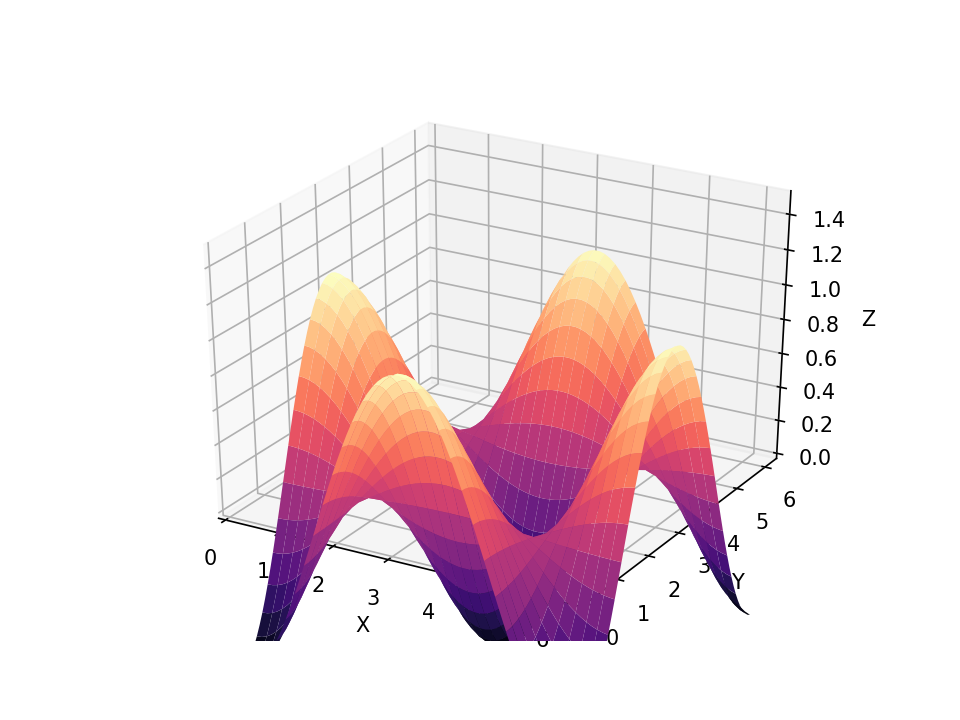

In [3]:
#the slower but more thorough graph; can't be set in cycle

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation

def init():
    ax.set_xlim(0, 2.0*np.pi)
    ax.set_ylim(0, 2.0*np.pi)
    #ax.set_zlim3d([0.0, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(x_1, y_1, zarray[frame_number, :, :], cmap="magma")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_1, y_1 = np.meshgrid(x, y)
zarray = h


plot = [ax.plot_surface(x_1, y_1, h[0,:,:], color='0.1', rstride=1, cstride=1)]
ax.set_zlim(0,1.5)
animate = animation.FuncAnimation(fig, update_plot, T, init_func = init, fargs=(h, plot) , interval = 1)
plt.show()

<IPython.core.display.Javascript object>


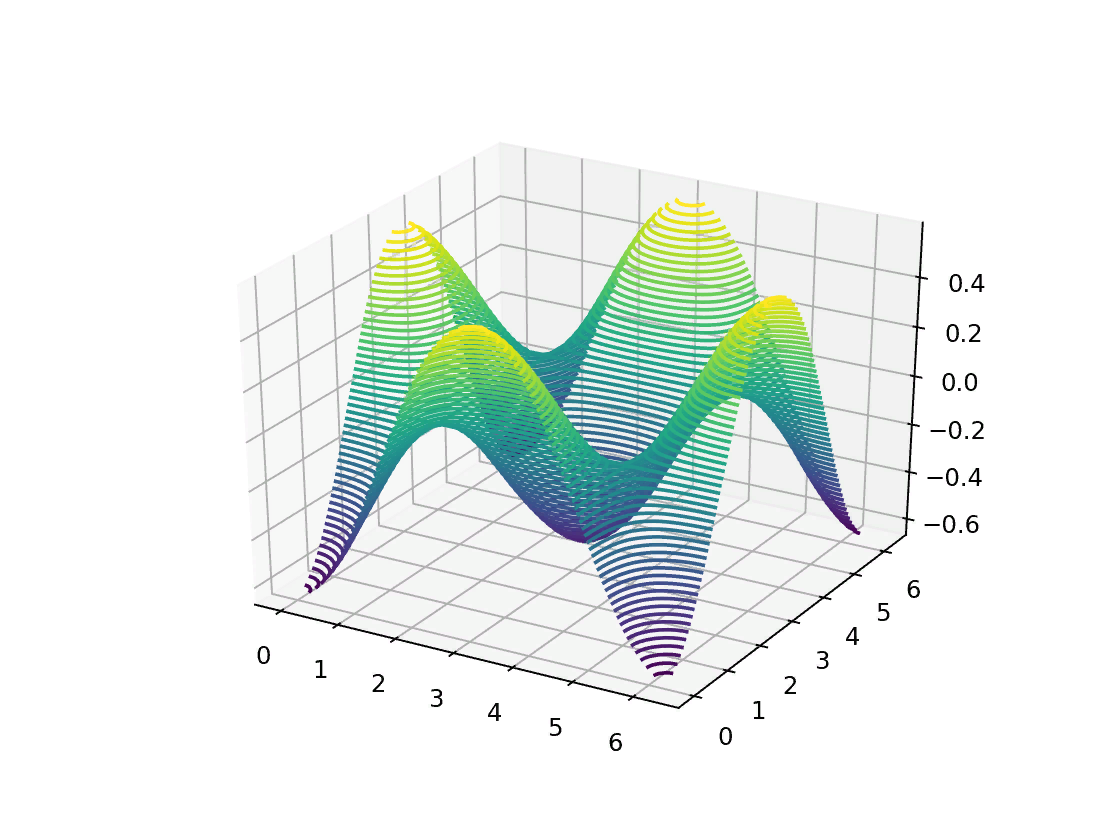

In [31]:
#this would work in cycle but it's not that nice
%matplotlib notebook
import time
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
ax.set_zlim3d([-1.0, 1.0])

for z in range(0, 300, 5):
    ax.clear()
    ax.contour3D(x, y, h[z], 50)
    fig.canvas.draw()
    

Исследуем нашу схему на устойчивость. 
Представим в таком виде наш вектор-столбец.
$$
    \begin{pmatrix}
        u\\ v\\ h
    \end{pmatrix}_{j, k}^n = \lambda^ne^{iwj}e^{i\Omega k}
    \begin{pmatrix}
        \hat{u}\\ \hat{v}\\ \hat{h}
    \end{pmatrix}
$$
Подставив его в нашу численную схему, получим:

$$
    \begin{cases}
        (\lambda - 1)\hat{u} = -\frac{i\Delta t}{\Delta x}\sin{w}\hat{h}\\
        (\lambda - 1)\hat{v} = -\frac{i\Delta t}{\Delta y}\sin{\Omega}\hat{h}\\\
        (\lambda - 1)\hat{h} = -\frac{i\Delta t}{\Delta x}\sin{w}\hat{u}-
        \frac{i\Delta t}{\Delta y}\sin{\Omega}\hat{v}
    \end{cases}
$$
Нетривиальное решение будет в том и только в том случае, если будет не равен нулю определитель:
$$
    \begin{vmatrix}
        \lambda - 1 & 0 & i\sin{w}\frac{\Delta t}{\Delta x}\\
        0 & \lambda - 1 & i\sin{\Omega}\frac{\Delta t}{\Delta y}\\
        i\sin{w}\frac{\Delta t}{\Delta x} & i\sin{\Omega}\frac{\Delta t}{\Delta y} & \lambda - 1
    \end{vmatrix} = 0
    \Longrightarrow
    (\lambda - 1)^2 =-\left(\sin{w}\frac{\Delta t}{\Delta x}\right)^2-\left(\sin{\Omega}\frac{\Delta t}{\Delta y}\right)^2
    \Longrightarrow\\
    \lambda = 1\pm i\sqrt{\left(\sin{w}\frac{\Delta t}{\Delta x}\right)^2+\left(\sin{\Omega}\frac{\Delta t}{\Delta y}\right)^2}
    \Longrightarrow
    |\lambda|^2\geq 1
$$
Схема получилась безусловно неустойчивой

Значит нужно придумать схему, которая будет устойчивой. Рассмотрим полудискретный вид нашей схемы (аппроксимируем производную по пространству). Получим следующую систему:
$$
    \begin{cases}
        \frac{\partial u_{i,j}}{\partial t} = -\frac{h_{i+1,j}-h_{i-1,j}}{2\Delta x}\\
        \frac{\partial v_{i,j}}{\partial t} = -\frac{h_{i,j+1}-h_{i,j-1}}{2\Delta y}\\
        \frac{\partial h_{i,j}}{\partial t} = -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}
    \end {cases}
$$
По сути спектр правой части мы неявно нашли, когда исследовали использованную выше схему на устойчивость. Для данной правой части собственные значения имеют число комплексный вид: 
$$\mu = \pm i\sqrt{\left(\frac{\sin{w}}{\Delta x}\right)^2+\left(\frac{\sin{\Omega}}{\Delta y}\right)^2}$$
Это означает, что, если мы хотим получить устойчивую схему, аппроксимирующую исходную систему уравнений, нужно использовать такую аппроксимацию производной по времени, которая устойкива на некотором подмножестве комплексной оси.

В данном случае таким методом был выбрат явный метод Рунге-Кутты четвёртого порядка аппроксимации
$$
    y' = f(x, y), y(0) = u_o(x)\\
    y^{n+1} = y^n + \frac{\Delta t}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\
    k_1 = f(t^n, y^n)\\
    k_2 = f\left(t^n + \frac{\Delta t}{2}, y^n + \frac{\Delta t}{2}k_1\right)\\
    k_3 = f\left(t^n + \frac{\Delta t}{2}, y^n + \frac{\Delta t}{2}k_2\right)\\
    k_4 = f(t^n + \Delta t, y^n + \Delta tk_3)
$$

Воспользуемся линейностью правой части (то есть $\hat{L}(x+y)=\hat{L}x+\hat{L}y$, где $\hat{L}$ - оператор правой части). Поскольку правая часть от времени явно не зависит, то формулы для расчёта $k_i, i\in\{1, 2, 3, 4\}$ будут записываться следующим образом:
$$
    k_1 = f(y^n)\\
    k_2 = k_1 + \frac{\Delta t}{2}f(k_1)\\
    k_3 = k_1 + \frac{\Delta t}{2}f(k_2)\\
    k_4 = k_1 + \Delta t f(k_3)
$$

In [31]:
#Runge-Kutta 4 method of time approximation with space cycle
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

k_1 = np.zeros((3, N + 1, M + 1))
k_2 = np.zeros((3, N + 1, M + 1))
k_3 = np.zeros((3, N + 1, M + 1))
k_4 = np.zeros((3, N + 1, M + 1))

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')


h = np.zeros((T, N + 1, M + 1))
u = np.zeros((T, N + 1, M + 1))
v = np.zeros((T, N + 1, M + 1))

for i in range(N + 1):  #initializing of initial conditions
    for j in range(M + 1):
        h[0, i, j] = u_0(x[i], y[j])


for k in range(T - 1):
    for i in range(N + 1):
        for j in range(M + 1):
            k_1[0][i][j] = -(h[k][ix_p[i]][iy_c[j]] - h[k][ix_m[i]][iy_c[j]])/(2 * dx)
            k_1[1][i][j] = -(h[k][ix_c[i]][iy_p[j]] - h[k][ix_c[i]][iy_m[j]])/(2 * dy)
            k_1[2][i][j] = -(u[k][ix_p[i]][iy_c[j]] - u[k][ix_m[i]][iy_c[j]])/(2 * dx) -(v[k][ix_c[i]][iy_p[j]] - v[k][ix_c[i]][iy_m[j]])/(2 * dy)

            k_2[0][i][j] = k_1[0][i][j] - (k_1[2][ix_p[i]][iy_c[j]] - k_1[2][ix_m[i]][iy_c[j]])/(2 * dx) * (dt / 2)
            k_2[1][i][j] = k_1[1][i][j] - (k_1[2][ix_c[i]][iy_p[j]] - k_1[2][ix_c[i]][iy_m[j]])/(2 * dx) * (dt / 2)
            k_2[2][i][j] = k_1[2][i][j] - (k_1[0][ix_p[i]][iy_c[j]] - k_1[0][ix_m[i]][iy_c[j]])/(2 * dx) * (dt / 2) - (k_1[1][ix_c[i]][iy_p[j]] - k_1[1][ix_c[i]][iy_m[j]])/(2 * dy) * (dt / 2)

            k_3[0][i][j] = k_1[0][i][j] - (k_2[2][ix_p[i]][iy_c[j]] - k_2[2][ix_m[i]][iy_c[j]])/(2 * dx) * (dt / 2)
            k_3[1][i][j] = k_1[1][i][j] - (k_2[2][ix_c[i]][iy_p[j]] - k_2[2][ix_c[i]][iy_m[j]])/(2 * dx) * (dt / 2)
            k_3[2][i][j] = k_1[2][i][j] - (k_2[0][ix_p[i]][iy_c[j]] - k_2[0][ix_m[i]][iy_c[j]])/(2 * dx) * (dt / 2) - (k_2[1][ix_c[i]][iy_p[j]] - k_2[1][ix_c[i]][iy_m[j]])/(2 * dy) * (dt / 2)

            k_4[0][i][j] = k_1[0][i][j] - (k_3[2][ix_p[i]][iy_c[j]] - k_3[2][ix_m[i]][iy_c[j]])/(2 * dx) * dt
            k_4[1][i][j] = k_1[1][i][j] - (k_3[2][ix_c[i]][iy_p[j]] - k_3[2][ix_c[i]][iy_m[j]])/(2 * dx) * dt
            k_4[2][i][j] = k_1[2][i][j] - (k_3[0][ix_p[i]][iy_c[j]] - k_3[0][ix_m[i]][iy_c[j]])/(2 * dx) * dt - (k_3[1][ix_c[i]][iy_p[j]] - k_3[1][ix_c[i]][iy_m[j]])/(2 * dy) * dt
    
            u[(k + 1)][i][j] = u[k][i][j] + (dt / 6) * (k_1[0][i][j] + 2 * k_2[0][i][j] + 2 * k_3[0][i][j] + k_4[0][i][j])
            v[(k + 1)][i][j] = v[k][i][j] + (dt / 6) * (k_1[1][i][j] + 2 * k_2[1][i][j] + 2 * k_3[1][i][j] + k_4[1][i][j])
            h[(k + 1)][i][j] = h[k][i][j] + (dt / 6) * (k_1[2][i][j] + 2 * k_2[2][i][j] + 2 * k_3[2][i][j] + k_4[2][i][j])
    #ax.clear()
    #ax.contour3D(x, y, h[k], 50)
    #fig.canvas.draw()

<IPython.core.display.Javascript object>


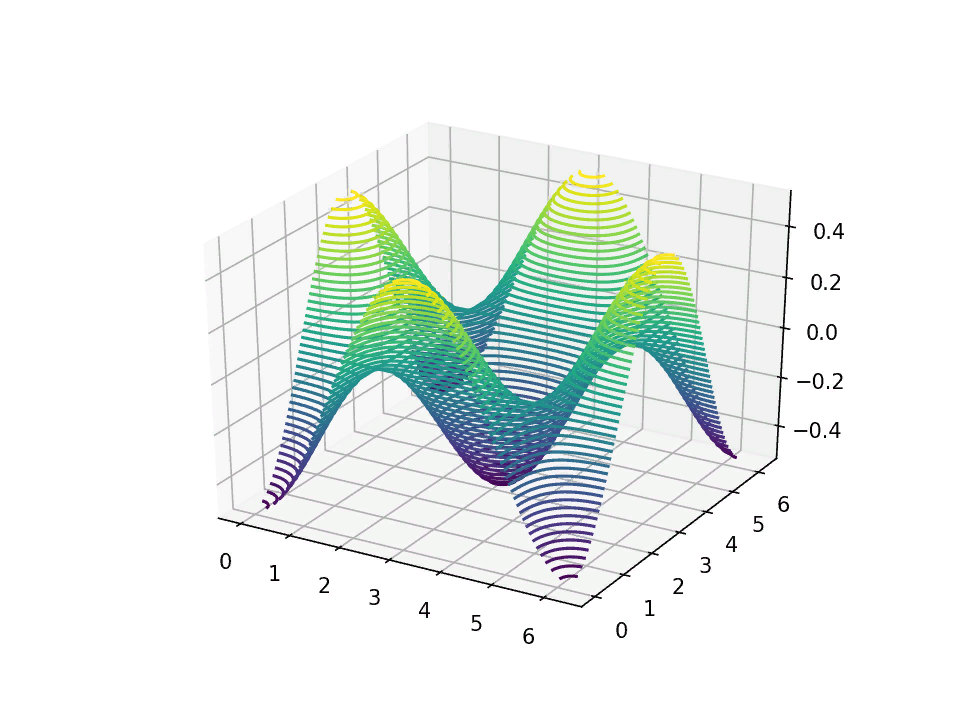

In [33]:
#this would work in cycle but it's not that nice
%matplotlib notebook
import time
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.xlim(0, 2*np.pi)
plt.ylim(0, 2*np.pi)
ax.set_zlim3d([-1.0, 1.0])

for z in range(0, T, 5):
    ax.clear()
    ax.contour3D(x, y, h[z], 50)
    fig.canvas.draw()
    

Посмотрим, как меняется норма ошибки в зависимости от шага интегрирования. Для этого нужно решить уравнение точно. Система была сведена к волновому уравнению относительно $h$.
$$
    \frac{\partial^2h}{\partial t^2} = \frac{\partial^2h}{\partial x^2}+\frac{\partial^2h}{\partial y^2}
$$
Начальный условия таковы: $h(x, y)|_{t=0} = \cos(x)\cdot\cos(y); h(x,y)'_t|_{t=0} = 0$

Точное решение даётся формулой:
$$
    h_{exact} = \cos{y}\cos{x}\cos{\sqrt{2}t}
$$

In [32]:
def h_exact(x, y, t):
    return np.cos(x) * np.cos(y) * np.cos(np.sqrt(2) * t)

solution = np.zeros((N + 1, M + 1))

for i in range(N + 1):  #initializing of initial conditions
    for j in range(M + 1):
        solution[i, j] = h_exact(x[i], y[j], (T - 1) * dt)
print(np.max(np.abs(solution - h[T - 1])))
print(np.linalg.norm(np.abs(solution - h[T - 1])))

0.004392621759763654
0.5971196869187866


Будем считать норму на шаге T - 1 = 299 по времени (шаг по времени $\Delta t = 0.01$ для различных размельчений сетки.
$$
\begin{cases}
    \|err\|_{C} = 0.0822955659553598, N = 16, M = 16\\
    \|err\|_{l_2} = 0.6991324981996201, N = 16, M = 16
\end{cases}\\
\begin{cases}
    \|err\|_{C} = 0.022303211936096135, N = 32, M = 32\\
    \|err\|_{l_2} = 0.3675165507412054, N = 32, M = 32
\end{cases}\\
\begin{cases}
    \|err\|_{C} = 0.005791489274574846, N = 64, M = 64\\
    \|err\|_{l_2} = 0.1875223365773045, N = 64, M = 64
\end{cases}\\
\begin{cases}
    \|err\|_{C} = 0.002493260328386704, N = 128, M = 128\\
    \|err\|_{l_2} = 0.17130524032908326, N = 128, M = 128
\end{cases}\\
\begin{cases}
    \|err\|_{C} = 0.004392621759763654, N = 256, M = 256\\
    \|err\|_{l_2} = 0.5971196869187866, N = 256, M = 256
\end{cases}
$$

Видно, что норма ошибки падает с уменьшением разбиения сетки. Тот факт, что при изменении шага сетки с $64$ до $128$ $C$-норма упала всего в 2 раза, $l_2$-норма почти не изменилась а при шаге $256$ вообще они начали расти, можно объяснить тем, что развивается неустойчивость, поскольку все замеры норм проводились при одном и том же шаге по времени